**NAME**: Raymond Shum

**CLASS**: CST383-30_SP22

**ASSIGNMENT**: W4, Lab 2 - Missing Data

**DUE DATE**: Feb. 1, 2022


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In this lab we'll practice treating NA values in Pandas.  Remember, in Pandas both None and nan values are thought of as NA values.

1. We’ll start with data on air quality in New York City in 1973. Here is a link:

https://raw.githubusercontent.com/grbruns/cst383/master/airquality.csv (Links to an external site.)
(source of data: 'airquality' data set supplied with R programming language)

Read the data as a Pandas data frame as variable 'df'.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/airquality.csv")

2. Display the first rows of the data frame in the console.

In [5]:
df.head()

,Ozone,Solar_R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


3. What are the types of columns in the data frame?  Write the code to display them.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar_R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


4. What is the total number of NA values in the data frame?  What fraction of all the values in the data frame are NA's?

In [10]:
df.isnull().sum().sum()

44

5. How many rows contain NA values?

In [15]:
np.sum(df.isnull().sum(axis=1) > 0)

42

6. For each column, what fraction of the column values are NA values?

In [29]:
df.isnull().sum() / len(df)

Ozone      0.241830
Solar_R    0.045752
Wind       0.000000
Temp       0.000000
Month      0.000000
Day        0.000000
dtype: float64

7. For each row, what fraction of the row values are NA?

In [39]:
df.isnull().sum(axis=1) / df.shape[1]

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.333333
         ...   
148    0.000000
149    0.166667
150    0.000000
151    0.000000
152    0.000000
Length: 153, dtype: float64

8. Following problem 6, plot, for each column, the fraction of the values in that column that are NA.

<AxesSubplot:title={'center':'Fraction NA per column'}>

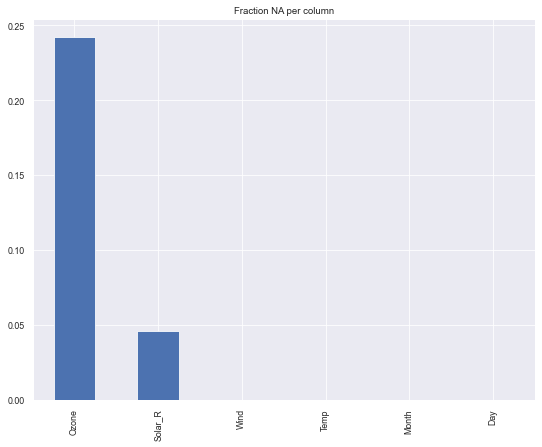

In [41]:
na_val = df.isnull().sum() / len(df)
na_val.plot(title="Fraction NA per column", kind='bar')

9. In this data set, if you decided to remove the NA values, would you do it by removing rows, or by removing columns?

I would remove columns unless the rows were unusable with an null value in that cell. Seems the majority of the columns have no issues with null values.

10. Create a new data frame df_cleanrows that is like dat except all rows containing NA values are removed.  Verify that there are no NA values in df_cleanrows.

In [44]:
df_cleanrows = df.dropna()
df_cleanrows.isnull().sum().sum()

0

11. Create a new data frame df_cleancols that is like dat except all columns containing NA values are removed.

In [47]:
df_cleancols = df.dropna(axis=1)
df_cleancols.info()
df_cleancols.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wind    153 non-null    float64
 1   Temp    153 non-null    int64  
 2   Month   153 non-null    int64  
 3   Day     153 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 4.9 KB


0

12. Which contains more data, df_cleanrows, or df_cleancols? 

In [51]:
# does not actually account for equal
"df_cleanrows" if df_cleanrows.size > df_cleancols.size else 'df_cleancols'

'df_cleanrows'

13. Create a new data frame df_med from your original data frame ‘df’ by replacing each NA value with the median of its column.

In [55]:
col_med = {col: df[col].median() for col in df.columns}
df_med = df.fillna(col_med)

14. Create a new data frame df_mean from your original data frame ‘df’ by replacing each NA value with the mean of its column.

In [57]:
col_mean = {col: df[col].mean() for col in df.columns}
df_mean = df.fillna(col_mean)

15. If you still have time, write code to handle missing values in the Iris dataset as described at the end of the lecture. 

Here is a URL for the Iris dataset used in the lecture.
https://raw.githubusercontent.com/grbruns/cst383/master/iris-na.csv

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/iris-na.csv')

In [60]:
df.head()

,s_len,s_wid,p_len,p_wid,species
0,5.0,3.5,1.6,0.6,setosa
1,7.7,3.8,NaN,2.2,virginica
2,5.0,2.0,NaN,1.0,versicolor
3,7.2,3.0,5.8,1.6,virginica
4,0.0,3.1,NaN,1.8,virginica


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   s_len    12 non-null     float64
 1   s_wid    11 non-null     float64
 2   p_len    4 non-null      float64
 3   p_wid    12 non-null     float64
 4   species  11 non-null     object 
dtypes: float64(4), object(1)
memory usage: 608.0+ bytes


In [63]:
df.shape

(12, 5)

In [ ]:
# Drop p_len because it's > 60% null
# Drop null row in species

In [65]:
# actually, the single null s_wid row can be dropped
df[df['s_wid'].isnull()]

,s_len,s_wid,p_len,p_wid,species
6,6.8,NaN,NaN,1.4,NaN
